In [1]:
from glob import glob
import pandas as pd
import numpy as np

In [2]:
from aggmap import AggMap
from aggmap import show

# 01. species level data

In [11]:
abundances = glob('./species_level/*/abundance.tsv')
df1 = pd.DataFrame(abundances, columns=['abundance_file'])
df1['dataset'] = df1.abundance_file.apply(lambda x:x.split('/')[2])
df1 = df1.set_index('dataset')

labels = glob('./species_level/*/labels.txt')
df2 = pd.DataFrame(labels, columns=['label_file'])
df2['dataset'] = df2.label_file.apply(lambda x:x.split('/')[2])
df2 = df2.set_index('dataset')

df = df1.join(df2)

In [67]:
sp_all = []
infos = []
for i in range(len(df)):
    name = df.iloc[i].name
    dfa = pd.read_csv(df.abundance_file.iloc[i],sep='\t', header=None, index_col=0)
    dfb = pd.read_csv(df.label_file.iloc[i],sep='\t', header=None, index_col=0)
    dfa.columns = dfb.index
    dfa = dfa.T
    s, n = dfa.shape
    info = {'dataset':name, '# of sample':s, '# of feature': n}
    details = dfa.index.value_counts().to_dict()
    info.update({'label_detail': details})
    infos.append(info)
    sp_all.append(dfa)

In [68]:
len(set(sp_all[0].columns) & set(sp_all[1].columns) & set(sp_all[2].columns) & set(sp_all[3].columns) & set(sp_all[4].columns))

316

In [69]:
len(set(sp_all[0].columns) | set(sp_all[1].columns) | set(sp_all[2].columns) | set(sp_all[3].columns) | set(sp_all[4].columns))

772

In [70]:
pd.DataFrame(infos)

,dataset,# of sample,# of feature,label_detail
0,T2D,440,606,"{'t2d': 223, 'n': 217}"
1,CRC,134,507,"{'cancer': 48, 'n': 47, 'adenoma': 39}"
2,IBD,110,443,"{'n': 85, 'ibd': 25}"
3,Cirrhosis,232,542,"{'cirrhosis': 118, 'n': 114}"
4,Obesity,253,465,"{'obesity': 164, 'leaness': 89}"


In [71]:
pd.Series(dfa.columns).apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)

,k,p,c,o,f,g,s
0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_smithii
1,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_unclassified
2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera_stadtmanae
3,Bacteria,Acidobacteria,Acidobacteriia,Acidobacteriales,Acidobacteriaceae,Acidobacteriaceae_unclassified,NaN
4,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces,Actinomyces_graevenitzii
...,...,...,...,...,...,...,...
460,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,Saccharomyces_cerevisiae
461,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomycetaceae_unclassified,NaN
462,Eukaryota,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,Schizosaccharomyces_pombe
463,Eukaryota,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,Schizosaccharomyces_unclassified


In [78]:
df = pd.concat(sp_all, axis=0).fillna(0)
dfx = np.log(df + 1).reset_index(drop=True)

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [217]:
dfs = pd.Series(dfx.columns).apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)
level_dict = {'k':'kingdom', 'p':'phylum', 'c':'class' ,'o':'order' ,'f':'family' ,'g': 'genus','s': 'species'}
dfs = dfs.rename(columns=level_dict)
dfs

,kingdom,phylum,class,order,family,genus,species
0,Archaea,Euryarchaeota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Archaeoglobaceae_unclassified,NaN
1,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,Methanobacterium_unclassified
2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_smithii
3,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_unclassified
4,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera_stadtmanae
...,...,...,...,...,...,...,...
767,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetales_noname,Candida,Candida_tropicalis
768,Eukaryota,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,Schizosaccharomyces_pombe
769,Eukaryota,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,Schizosaccharomyces_unclassified
770,Eukaryota,Eukaryota_noname,Eukaryota_noname,Eukaryota_noname,Eukaryota_noname,Entamoeba,Entamoeba_dispar


In [232]:
level = 'phylum'
so = dfs.groupby(level).size() 
md = {}
for i, j in so.items():
    if j < 5:
        md[i] = 'Others'
    else:
        md[i] = i
        
res = dfs[level].map(md)
feature_group_list = res.tolist()

In [233]:
pd.Series(feature_group_list).value_counts()

Firmicutes        332
Proteobacteria    162
Bacteroidetes     117
Actinobacteria     94
Others             25
Fusobacteria       14
Ascomycota         12
Spirochaetes        9
Euryarchaeota       7
dtype: int64

In [234]:
mp = AggMap(dfx, metric='correlation')

2021-08-13 17:36:07,769 - INFO - [bidd-aggmap] - Calculating distance ...
2021-08-13 17:36:07,804 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 772/772 [00:01<00:00, 707.75it/s]


In [235]:
mp = mp.fit(feature_group_list = feature_group_list, verbose=0, var_thr=1e-8)

2021-08-13 17:36:20,879 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-08-13 17:36:21,773 - INFO - [bidd-aggmap] - Finished


In [236]:
mp.plot_scatter()

2021-08-13 17:36:21,781 - INFO - [bidd-aggmap] - generate file: ./feature points_731_correlation_umap_scatter
2021-08-13 17:36:21,830 - INFO - [bidd-aggmap] - save html file to ./feature points_731_correlation_umap_scatter


In [237]:
mp.plot_grid()

2021-08-13 17:36:21,838 - INFO - [bidd-aggmap] - generate file: ./feature points_731_correlation_umap_mp
2021-08-13 17:36:21,877 - INFO - [bidd-aggmap] - save html file to ./feature points_731_correlation_umap_mp


In [238]:
# fig_tree = mp.plot_tree(add_leaf_labels = False, leaf_font_size = 1)
# fig_tree.savefig('./cluster5_tree.png', bbox_inches='tight', dpi=300)

100%|##########| 1169/1169 [00:03<00:00, 296.22it/s]


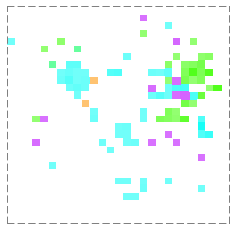

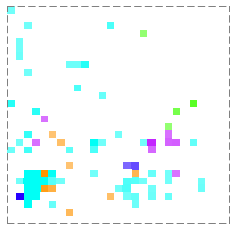

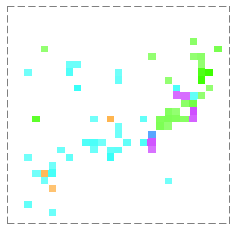

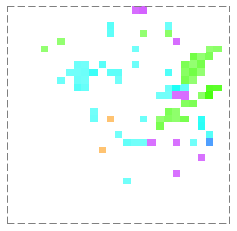

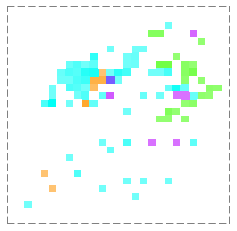

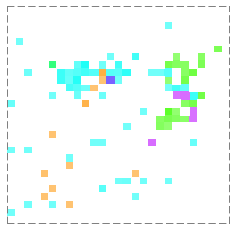

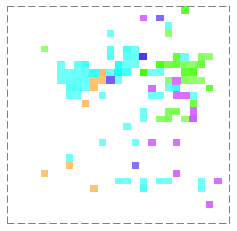

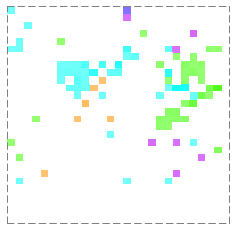

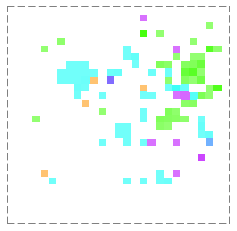

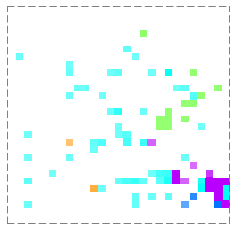

In [240]:
X = mp.batch_transform(dfx.values, scale_method='minmax')
for i in range(1, 1000, 100):
    x = X[i]
    show.imshow_wrap(x, mode = 'white',color_list= pd.Series(mp.colormaps).tolist(), x_max= 1, )

In [ ]:
LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:

# 02. genus level data

In [247]:
abundances = glob('./genus_level/*/*/abundance.tsv')
df1 = pd.DataFrame(abundances, columns=['abundance_file'])
df1['dataset'] = df1.abundance_file.apply(lambda x:x.split('/')[-2])
df1 = df1.set_index('dataset')

labels = glob('./genus_level/*/*/labels.txt')
df2 = pd.DataFrame(labels, columns=['label_file'])
df2['dataset'] = df2.label_file.apply(lambda x:x.split('/')[-2])
df2 = df2.set_index('dataset')

df = df1.join(df2)

In [248]:
df

,abundance_file,label_file
dataset,,
CDf,./genus_level/IBD_Sub/CDf/abundance.tsv,./genus_level/IBD_Sub/CDf/labels.txt
CDr,./genus_level/IBD_Sub/CDr/abundance.tsv,./genus_level/IBD_Sub/CDr/labels.txt
iCDf,./genus_level/IBD_Sub/iCDf/abundance.tsv,./genus_level/IBD_Sub/iCDf/labels.txt
UCr,./genus_level/IBD_Sub/UCr/abundance.tsv,./genus_level/IBD_Sub/UCr/labels.txt
iCDr,./genus_level/IBD_Sub/iCDr/abundance.tsv,./genus_level/IBD_Sub/iCDr/labels.txt
UCf,./genus_level/IBD_Sub/UCf/abundance.tsv,./genus_level/IBD_Sub/UCf/labels.txt


In [249]:
sp_all = []
infos = []
for i in range(len(df)):
    name = df.iloc[i].name
    dfa = pd.read_csv(df.abundance_file.iloc[i],sep='\t', header=None, index_col=0)
    dfb = pd.read_csv(df.label_file.iloc[i],sep='\t', header=None, index_col=0)
    dfa.columns = dfb.index
    dfa = dfa.T
    s, n = dfa.shape
    info = {'dataset':name, '# of sample':s, '# of feature': n}
    details = dfa.index.value_counts().to_dict()
    info.update({'label_detail': details})
    infos.append(info)
    sp_all.append(dfa)

In [253]:
len(set(sp_all[0].columns) & set(sp_all[1].columns) & set(sp_all[2].columns) & set(sp_all[3].columns) & set(sp_all[4].columns) & set(sp_all[5].columns))

226

In [254]:
len(set(sp_all[0].columns) | set(sp_all[1].columns) | set(sp_all[2].columns) | set(sp_all[3].columns) | set(sp_all[4].columns) | set(sp_all[5].columns))

301

In [273]:
df = pd.concat(sp_all, axis=0).fillna(0)
dfx = np.log(df + 1e-8).reset_index(drop=True)

In [274]:
dfs = pd.Series(dfx.columns).apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)
level_dict = {'k':'kingdom', 'p':'phylum', 'c':'class' ,'o':'order' ,'f':'family' ,'g': 'genus','s': 'species'}
dfs = dfs.rename(columns=level_dict)
dfs

,kingdom,phylum,class,order,family,genus
0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter
1,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera
2,Bacteria.....,NaN,NaN,NaN,NaN,NaN
3,Bacteria,Acidobacteria,.Chloracidobacteria.,RB41,Ellin6075,
4,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,
...,...,...,...,...,...,...
296,Bacteria,Tenericutes,Mollicutes,Anaeroplasmatales,Anaeroplasmataceae,
297,Bacteria,Tenericutes,Mollicutes,RF39,,
298,Bacteria,Tenericutes,RF3,ML615J.28,,
299,Bacteria,Verrucomicrobia,Opitutae,.Cerasicoccales.,.Cerasicoccaceae.,


In [287]:
level = 'class'
so = dfs.groupby(level).size() 
md = {}
for i, j in so.items():
    if j < 5:
        md[i] = 'Others'
    else:
        md[i] = i
res = dfs[level].map(md)
feature_group_list = res.tolist()

In [288]:
pd.Series(feature_group_list).value_counts()

Clostridia             73
Others                 35
Bacilli                35
Gammaproteobacteria    34
Betaproteobacteria     28
Alphaproteobacteria    23
Actinobacteria         23
Bacteroidia            23
Erysipelotrichi        11
Fusobacteriia           6
Deltaproteobacteria     6
dtype: int64

In [289]:
mp = AggMap(dfx, metric='correlation')

2021-08-16 14:27:46,410 - INFO - [bidd-aggmap] - Calculating distance ...
2021-08-16 14:27:46,418 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 301/301 [00:00<00:00, 652.80it/s]


In [290]:
mp = mp.fit(feature_group_list = feature_group_list, verbose=0, var_thr=0)

2021-08-16 14:27:50,876 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-08-16 14:27:51,087 - INFO - [bidd-aggmap] - Finished


In [291]:
mp.plot_scatter()

2021-08-16 14:27:51,093 - INFO - [bidd-aggmap] - generate file: ./feature points_301_correlation_umap_scatter
2021-08-16 14:27:51,122 - INFO - [bidd-aggmap] - save html file to ./feature points_301_correlation_umap_scatter


In [292]:
mp.plot_grid()

2021-08-16 14:27:51,218 - INFO - [bidd-aggmap] - generate file: ./feature points_301_correlation_umap_mp
2021-08-16 14:27:51,246 - INFO - [bidd-aggmap] - save html file to ./feature points_301_correlation_umap_mp


100%|##########| 553/553 [00:00<00:00, 1483.06it/s]


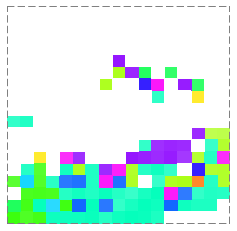

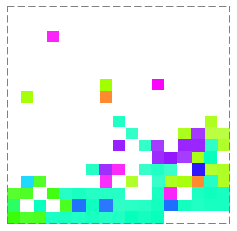

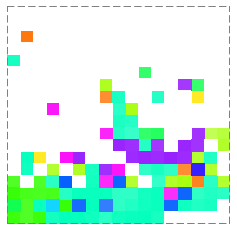

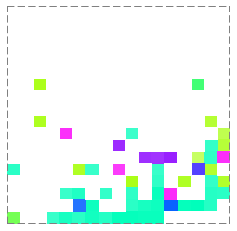

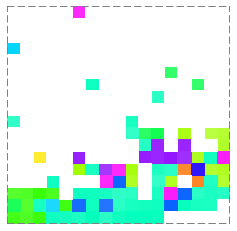

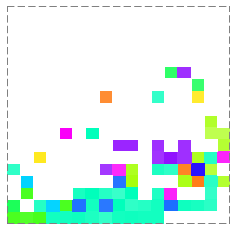

In [293]:
X = mp.batch_transform(dfx.values, scale_method='minmax')
for i in range(1, 300, 50):
    x = X[i]
    show.imshow_wrap(x, mode = 'white',color_list= pd.Series(mp.colormaps).tolist(), x_max= 1, )

In [4]:
pd.DataFrame([1,2,3,4,5]).median()

0    3.0
dtype: float64